# Coding the Perceptron Algorithm
Time to code! In this quiz, you'll have the chance to implement the perceptron algorithm to separate the following data (given in the file data.csv).

Recall that the perceptron step works as follows. For a point with coordinates $(p,q)$, label $y$, and prediction given by the equation $\hat{y} = step(w_1x_1 + w_2x_2 + b)$ :

If the point is correctly classified, do nothing.
If the point is classified positive, but it has a negative label, **subtract** $\alpha p, \alpha q$, and $\alpha$ from $w_1, w_2$, and $b$ respectively.

If the point is classified negative, but it has a positive label, **add** $\alpha p, \alpha q$, and $\alpha$ to $w_1, w_2$, and $b$ respectively.

Then click on test run to graph the solution that the perceptron algorithm gives you. It'll actually draw a set of dotted lines, that show how the algorithm approaches to the best solution, given by the black solid line.

Feel free to play with the parameters of the algorithm (number of epochs, learning rate, and even the randomizing of the initial parameters) to see how your initial conditions can affect the solution!

In [7]:
import numpy as np
import pandas as pd
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [112]:
def stepFunction(t: float) -> int:
    """ Returns 1 if t is positive, 0 otherwise. """
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b) -> int:
    """ Calculate the prediction. The calculation is then converted by the stepFunction"""
    return stepFunction((np.matmul(X,W)+b)[0])

In [131]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    """ Update the weights and biases (W, b) for each of the points in the wrong place.
        according to the perceptron algorithm, and return the new W and b.
        Parameters: data X, labels y, weights W (as an array), and bias b.
    """
    #print(f"X: {X.shape}\ labels: {y.shape} Weights:{W.shape} b:{b}")
    for i in range(len(X)):
        # Calculate the expected label
        y_hat = prediction(X[i], W, b)
        
        # Use the perceptron trick to adjust the weights if required (ie not required if difference = 0)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [141]:
def trainPerceptronAlgorithm(X, label, learn_rate = 0.01, num_epochs = 25) -> list:
    """ Runs the perceptron algorithm repeatedly on the dataset, and returns 
        a few of the boundary lines obtained in the iterations, for plotting purposes.
    """
    x_min, x_max = min(X.T[0]), max(X.T[0])  # The 1st column is x
    y_min, y_max = min(X.T[1]), max(X.T[1])  # The 2nd column is y
    W = np.array(np.random.rand(2,1))        # Initialize the array of weights with random numbers
    b = np.random.rand(1)[0] + x_max         # Initialize the array of bias/intercept with random numbers
    
    # These are the solution lines that get plotted below
    boundary_lines = []
    print(f"X: {X.shape} labels: {label.shape} weights:{W.shape}")
    for i in range(num_epochs):
        print(f"i: {i} Weights:{W[0]}{W[1]} b:{b:.3f}")
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, label, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines   # slope and intercept divided by the weight of the y

## Use the various functions
Start by read the data. [x, y, label].

In [121]:
data = pd.read_csv('Perceptron_data.csv', names = ['x','y', 'label'])

In [122]:
data.shape

(100, 3)

In [123]:
data.head()

,x,y,label
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [124]:
# Important to use .values to get np arrays
X = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [125]:
print(type(X), X.shape)
print(type(label), label.shape)
X.T[0]  # It is now a row

<class 'numpy.ndarray'> (100, 2)
<class 'numpy.ndarray'> (100,)


array([0.78051  , 0.28774  , 0.40714  , 0.2923   , 0.50922  , 0.27785  ,
       0.27527  , 0.43999  , 0.33557  , 0.23448  , 0.0084492, 0.12419  ,
       0.25644  , 0.4591   , 0.44547  , 0.42218  , 0.49563  , 0.30848  ,
       0.39707  , 0.32945  , 0.40739  , 0.3106   , 0.49638  , 0.10073  ,
       0.69907  , 0.29767  , 0.15099  , 0.16427  , 0.33259  , 0.53741  ,
       0.19503  , 0.40278  , 0.21296  , 0.48447  , 0.25476  , 0.21726  ,
       0.67078  , 0.3815   , 0.53838  , 0.4849   , 0.37095  , 0.54527  ,
       0.32149  , 0.42216  , 0.10194  , 0.15254  , 0.45558  , 0.28488  ,
       0.27633  , 0.39748  , 0.5533   , 0.44274  , 0.85176  , 0.60436  ,
       0.68243  , 1.       , 0.72989  , 0.67377  , 0.78761  , 0.71442  ,
       0.49379  , 0.78974  , 0.67905  , 0.6642   , 0.79396  , 0.70758  ,
       0.59421  , 0.49364  , 0.77707  , 0.79785  , 0.70876  , 0.69176  ,
       0.66408  , 0.65973  , 0.64574  , 0.89639  , 0.85476  , 0.62091  ,
       0.79057  , 0.58935  , 0.56846  , 0.65912  , 

In [150]:
# Run the model that will return a list of (m and b)
boundaries = trainPerceptronAlgorithm(X, label, learn_rate = 0.01, num_epochs = 25)

X: (100, 2) labels: (100,) weights:(2, 1)
i: 0 Weights:[0.72900717][0.77127035] b:1.074
i: 1 Weights:[0.38596717][0.42176495] b:0.574
i: 2 Weights:[0.04292717][0.07225955] b:0.074
i: 3 Weights:[-0.01245533][0.01265045] b:-0.006
i: 4 Weights:[-0.01018323][0.00201376] b:-0.006
i: 5 Weights:[-0.00791113][-0.00862293] b:-0.006
i: 6 Weights:[-0.00118433][-0.01474792] b:0.004
i: 7 Weights:[-0.00383993][-0.02183402] b:0.004
i: 8 Weights:[-0.00538993][-0.02484062] b:0.004
i: 9 Weights:[-0.01283953][-0.02846442] b:0.004
i: 10 Weights:[-0.00610613][-0.03072321] b:0.014
i: 11 Weights:[-0.00761053][-0.03242671] b:0.014
i: 12 Weights:[-0.00911493][-0.03413021] b:0.014
i: 13 Weights:[-0.01061933][-0.03583371] b:0.014
i: 14 Weights:[-0.01707693][-0.03948201] b:0.014
i: 15 Weights:[-0.02023313][-0.04016481] b:0.014
i: 16 Weights:[-0.01732843][-0.03865971] b:0.024
i: 17 Weights:[-0.01730113][-0.04006851] b:0.024
i: 18 Weights:[-0.01713753][-0.04194641] b:0.024
i: 19 Weights:[-0.01697393][-0.04382431] b

In [147]:
len(boundaries)

25

In [108]:
boundaries[0]

(array([-3.54852637]), array([15.10373942]))

## Ploting the results
Start by creating a two scatter plots with the two typs of points.

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

# Extract the x and y values from the big X matrix
x = X.T[0]
y = X.T[1]
points = list(zip(x, y, label))  # Create tuples of points

In [152]:
# Use the conditional list comprehension to create two list of poitns
points1 = [(n[0], n[1], n[2]) for n in points if n[2] == 1]
points0 = [(n[0], n[1], n[2]) for n in points if n[2] == 0]
len(points1) + len(points0)

100

Text(0, 0.5, 'y')

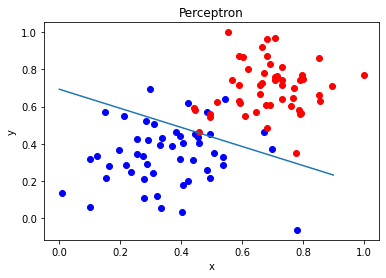

In [153]:
x,y,z = zip(*points1)   # Un-pack the 1st set of points
plt.scatter(x, y, color = 'blue')
x,y,z = zip(*points0)   # Un-pack the 2nd set of points
plt.scatter(x, y, color = 'red')

# Create a set of x 
x_pred = np.arange(0, 1, .1)

# Pick out the last iteration => 24, where there are two factors: m and b
# m = - weight_0/weight_1 and b = - bias/weight_1
m = boundaries[24][0]
b = boundaries[24][1]
y_pred = m * x_pred + b

# Plot the line and the labels
plt.plot(x_pred, y_pred)
plt.title('Perceptron')
plt.xlabel('x')
plt.ylabel('y')

In [103]:
m = boundaries[24]